# Libraries

In [ ]:
#install.packages("dplyr")

In [ ]:
library(dplyr)

In [ ]:
#install.packages("tidyverse")

In [ ]:
library(tidyverse)

In [ ]:
install.packages("geosphere")

In [ ]:
library(geosphere)

In [ ]:
install.packages("mice")

In [ ]:
library(mice)

# Yelp Data

## Data Import

In [196]:
data <- read.csv(file="data-1718515175697.csv", header=TRUE,sep=",",dec=";")

In [ ]:
data <- read.csv(file="data-1718515175697.csv", header=TRUE,sep=",",dec=";")

data_control <- read.csv(file="sql_4_output.csv", header=TRUE,sep=",",dec=";")

Warning message in file(file, "rt"):
“cannot open file 'sql_4_output.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


## Cleaning & Check

In [197]:
nrow(data)

[1] 5852

In [ ]:
head(data)

In [199]:
str(data)

'data.frame':	5852 obs. of  16 variables:
 $ business_id            : chr  "00AGVWzkxNLGb-7ZrwAOIA" "00rIcvqmfci_oJWkOqPqmg" "018ixB-WinNmflwX2UvS1g" "01mP5a06zQpaYOakfaVBOQ" ...
 $ business_lat           : chr  "39.9532594" "40.0571665" "39.9461554" "40.0727911933" ...
 $ business_long          : chr  "-75.2170205" "-75.2357367" "-75.1688026" "-75.1949470435" ...
 $ postal_code            : int  19139 19128 19103 19118 19104 19147 19103 19146 19147 19104 ...
 $ business_stars         : chr  "3.0" "4.5" "4.0" "2.5" ...
 $ business_stars_pre_2020: chr  "3.2" "4.6" "3.9" "2.5" ...
 $ review_count           : int  70 92 16 61 45 101 11 65 620 8 ...
 $ review_count_pre_2020  : chr  "75" "68" "16" "58" ...
 $ check_in_count         : chr  "73" "98" "39" "56" ...
 $ check_in_count_pre_2020: chr  "73" "89" "39" "56" ...
 $ attribute_count        : chr  "9" "8" "4" "8" ...
 $ business_park          : int  1 1 1 0 1 1 1 1 1 0 ...
 $ business_happy_h       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ busin

In [201]:
# NA values are represented in two ways: 'NULL' and 'None':

unique(data$business_price)

# To fix problem: Replace

data <- data %>%
  mutate(business_price = na_if(business_price, 'NULL')) %>%
  mutate(business_price = na_if(business_price, 'None'))

[1] "1"    "2"    "NULL" "3"    "4"    "None"

In [202]:
data$business_id  <- as.character(data$business_id)

data$business_lat <- as.numeric(data$business_lat)

data$business_long <- as.numeric(data$business_long)

data$business_stars <- as.numeric(data$business_stars)

data$business_stars_pre_2020 <- as.numeric(data$business_stars_pre_2020) #Has NA'S

data$business_review_count <- as.integer(data$review_count)

data$review_count_pre_2020 <- as.integer(data$review_count_pre_2020) #Has NA'S

data$check_in_count <- as.integer(data$check_in_count)

data$check_in_count_pre_2020 <- as.integer(data$check_in_count_pre_2020)

data$attribute_count <- as.integer(data$attribute_count)

data$business_park <- as.factor(data$business_park)

data$business_happy_h <- as.factor(data$business_happy_h)

data$business_price <- as.integer(data$business_price)

data$business_open  <- as.factor(data$business_open)

data$n_photo <- as.integer(data$n_photo)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [203]:
summary(data)

 business_id         business_lat   business_long     postal_code   
 Length:5852        Min.   :39.87   Min.   :-75.36   Min.   :19019  
 Class :character   1st Qu.:39.95   1st Qu.:-75.18   1st Qu.:19107  
 Mode  :character   Median :39.95   Median :-75.16   Median :19124  
                    Mean   :39.97   Mean   :-75.15   Mean   :19125  
                    3rd Qu.:40.00   3rd Qu.:-75.14   3rd Qu.:19145  
                    Max.   :40.14   Max.   :-74.94   Max.   :19454  
                                                     NA's   :1      
 business_stars  business_stars_pre_2020  review_count    review_count_pre_2020
 Min.   :1.000   Min.   :1.000           Min.   :   5.0   Min.   :   1.0       
 1st Qu.:3.000   1st Qu.:3.100           1st Qu.:  14.0   1st Qu.:  12.0       
 Median :3.500   Median :3.700           Median :  38.5   Median :  36.0       
 Mean   :3.556   Mean   :3.553           Mean   : 113.8   Mean   : 108.7       
 3rd Qu.:4.000   3rd Qu.:4.100           3rd Qu.

In [204]:
sum(is.na(data$business_price))

[1] 913

# External: Population Data

## Data Import

In [213]:
population_by_zip_2010 <- read.csv(file="population_by_zip_2010.csv", header=TRUE,sep=",",dec=";")

## Cleaning & Check

In [214]:
nrow(population_by_zip_2010)

n_distinct(population_by_zip_2010$zipcode)

[1] 1622831

[1] 33119

In [215]:
#To observe structure of dataset:

population_by_zip_2010 %>%
  filter(zipcode == "61747") %>%
    arrange(desc(population)) %>%
      slice_head(n=5)

population,minimum_age,maximum_age,gender,zipcode,geo_id
<int>,<int>,<int>,<chr>,<int>,<chr>
1560,NA,NA,,61747,8600000US61747
815,NA,NA,female,61747,8600000US61747
745,NA,NA,male,61747,8600000US61747
72,45,49,male,61747,8600000US61747
72,85,NA,female,61747,8600000US61747


In [216]:
summary(population_by_zip_2010)

   population        minimum_age     maximum_age        gender         
 Min.   :     0.0   Min.   : 0.00   Min.   : 4.00    Length:1622831    
 1st Qu.:    13.0   1st Qu.:20.00   1st Qu.:20.00    Class :character  
 Median :    60.0   Median :40.00   Median :41.50    Mode  :character  
 Mean   :   577.6   Mean   :41.52   Mean   :42.41                      
 3rd Qu.:   277.0   3rd Qu.:65.00   3rd Qu.:64.00                      
 Max.   :113916.0   Max.   :85.00   Max.   :84.00                      
                    NA's   :99357   NA's   :165595                     
    zipcode         geo_id         
 Min.   :  602   Length:1622831    
 1st Qu.:26636   Class :character  
 Median :49740   Mode  :character  
 Mean   :49668                     
 3rd Qu.:72125                     
 Max.   :99929                     
                                   

In [189]:
args(if_else)

function (condition, true, false, missing = NULL, ..., ptype = NULL, 
    size = NULL) 
NULL

In [217]:
#Replacing space ('') values with 'NULL' to be able to filter properly:

population_by_zip_2010 <- population_by_zip_2010 %>%
  mutate(gender = if_else(!gender %in% c("female", "male"), "NULL", gender))

In [218]:
# Creating the Population by Zipcode, with age subgroups:

pop_by_zip <- population_by_zip_2010 %>%
  group_by(zipcode) %>%
  summarise(
    total_population = sum(population[is.na(minimum_age) & is.na(maximum_age) & gender == "NULL"], na.rm = TRUE),
    total_population_children = sum(population[minimum_age >= 0 & maximum_age <= 14], na.rm = TRUE),
    total_population_youth = sum(population[minimum_age >= 15 & maximum_age <= 24], na.rm = TRUE),
    total_population_adults = sum(population[minimum_age >= 25 & maximum_age <= 64], na.rm = TRUE),
    total_population_seniors = sum(population[minimum_age >= 65], na.rm = TRUE)
  )

In [219]:
# Changing "zipcode" column name into "postal_code"; to match both dataset:

pop_by_zip <- pop_by_zip %>%
  rename(postal_code = zipcode)

In [ ]:
#Control:

pop_by_zip %>%
  filter(postal_code == "61747")

In [ ]:
#Control:

population_by_zip_2010 %>%
  filter(zipcode == "61747") %>%
    arrange(desc(population))

## Left Join into Dataset

In [222]:
# Left Join into Yelp Data

data <- data %>%
            left_join(pop_by_zip, by="postal_code")

# Calculation: Nearby Businesses


## Pairwise Distance Calculation

In [ ]:
#install.packages("geosphere")

In [223]:
library(geosphere)

In [226]:
# Selecting columns for distance matrix calculation:

data_1 <- data %>%
  select(business_id, business_lat, business_long)

In [227]:
# Calculate pairwise distances for all businesses:
df_distances <- data_1 %>%
  mutate(distances = apply(data_1[, c("business_long", "business_lat")], 1, function(x) distHaversine(data_1[, c("business_long", "business_lat")], x))) %>%
    select(business_id, distances)

In [229]:
# Seting a threshold distance (in meters)
threshold_distance <- 1000

# Filtering distances to find nearby businesses
nearby_counts <- df_distances %>%
  mutate(nearby_count = rowSums(distances <= threshold_distance), nearby_count_minus_1 = nearby_count - 1) %>% #adjusting for each business counting itself (subtracting 1 from each count)
    select(business_id, nearby_count_minus_1)

# Results
head(nearby_counts)

,business_id,nearby_count_minus_1
,<chr>,<dbl>
1,00AGVWzkxNLGb-7ZrwAOIA,145
2,00rIcvqmfci_oJWkOqPqmg,11
3,018ixB-WinNmflwX2UvS1g,1016
4,01mP5a06zQpaYOakfaVBOQ,42
5,01YFYYmevGER3VJ1xFtUcA,326
6,02nb6CI8w-2EoSEkQdk2Wg,405


## Left Join into Dataset

In [230]:
#For nearby_counts, i.e. business_proximity

data <- data %>%
            left_join(nearby_counts, by="business_id")

In [231]:
head(data)

,business_id,business_lat,business_long,postal_code,business_stars,business_stars_pre_2020,review_count,review_count_pre_2020,check_in_count,check_in_count_pre_2020,⋯,business_price,business_open,n_photo,business_review_count,total_population,total_population_children,total_population_youth,total_population_adults,total_population_seniors,nearby_count_minus_1
,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,⋯,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,00AGVWzkxNLGb-7ZrwAOIA,39.95326,-75.21702,19139,3.0,3.2,70,75,73,73,⋯,1,1,NA,70,41271,8924,6658,20247,5442,145
2,00rIcvqmfci_oJWkOqPqmg,40.05717,-75.23574,19128,4.5,4.6,92,68,98,89,⋯,1,1,5,92,35239,4124,5312,20997,4806,11
3,018ixB-WinNmflwX2UvS1g,39.94616,-75.16880,19103,4.0,3.9,16,16,39,39,⋯,1,0,NA,16,21908,971,2638,14135,4164,1016
4,01mP5a06zQpaYOakfaVBOQ,40.07279,-75.19495,19118,2.5,2.5,61,58,56,56,⋯,2,1,NA,61,9808,1402,1373,5324,1709,42
5,01YFYYmevGER3VJ1xFtUcA,39.95317,-75.19287,19104,2.5,2.6,45,47,53,53,⋯,2,0,1,45,51808,5260,25245,17786,3517,326
6,02nb6CI8w-2EoSEkQdk2Wg,39.93617,-75.14694,19147,4.0,4.2,101,94,472,466,⋯,1,1,2,101,36228,4330,4679,23209,4010,405


# Base Model (without External Population Data)

## Creating a Subset

In [ ]:
#install.packages("mice")

In [232]:
library(mice)

In [233]:
# Selecting the variables for analysis:
data_to_analysis <- data %>%
    select(check_in_count_pre_2020, business_stars_pre_2020, nearby_count_minus_1, attribute_count, business_price, business_happy_h)

## *Running the Model with NA's (Pre-Mice)

In [ ]:
# Check_in_frequency = β0 + β1 * avg_number_of_stars + β2 * business_proximity + β3 * number of characteristics + β4 * (price_level x happy hour) + ε

In [ ]:
install.packages("car") #test
library(car)

In [235]:
model_pre_mice <- lm(check_in_count_pre_2020 ~
              business_stars_pre_2020
              + nearby_count_minus_1
              + attribute_count
              + business_price * business_happy_h,
                                                   data_to_analysis)

In [236]:
#car::vif(m1) #test
summary(model_pre_mice)


Call:
lm(formula = check_in_count_pre_2020 ~ business_stars_pre_2020 + 
    nearby_count_minus_1 + attribute_count + business_price * 
    business_happy_h, data = data_to_analysis)

Residuals:
    Min      1Q  Median      3Q     Max 
 -844.2  -204.1   -65.3    67.4 16931.3 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -448.4666    39.8012 -11.268  < 2e-16 ***
business_stars_pre_2020            40.6767    10.0187   4.060 4.98e-05 ***
nearby_count_minus_1                0.2253     0.0188  11.985  < 2e-16 ***
attribute_count                    40.9155     2.0504  19.955  < 2e-16 ***
business_price                     49.3846    14.0270   3.521 0.000434 ***
business_happy_h1                  59.5360    76.7114   0.776 0.437727    
business_price:business_happy_h1  -34.1644    36.8424  -0.927 0.353811    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 509.2 on 4751 d

In [ ]:
# (1094 observations deleted due to missingness)

## Pattern of Missings

In [237]:
args(md.pattern)

function (x, plot = TRUE, rotate.names = FALSE) 
NULL

,nearby_count_minus_1,business_happy_h,attribute_count,business_stars_pre_2020,check_in_count_pre_2020,business_price,
4758,1,1,1,1,1,1,0
529,1,1,1,1,1,0,1
136,1,1,1,1,0,1,1
60,1,1,1,1,0,0,2
4,1,1,1,0,1,0,2
45,1,1,1,0,0,1,2
267,1,1,1,0,0,0,3
23,1,1,0,1,1,0,2
11,1,1,0,1,0,0,3
19,1,1,0,0,0,0,4


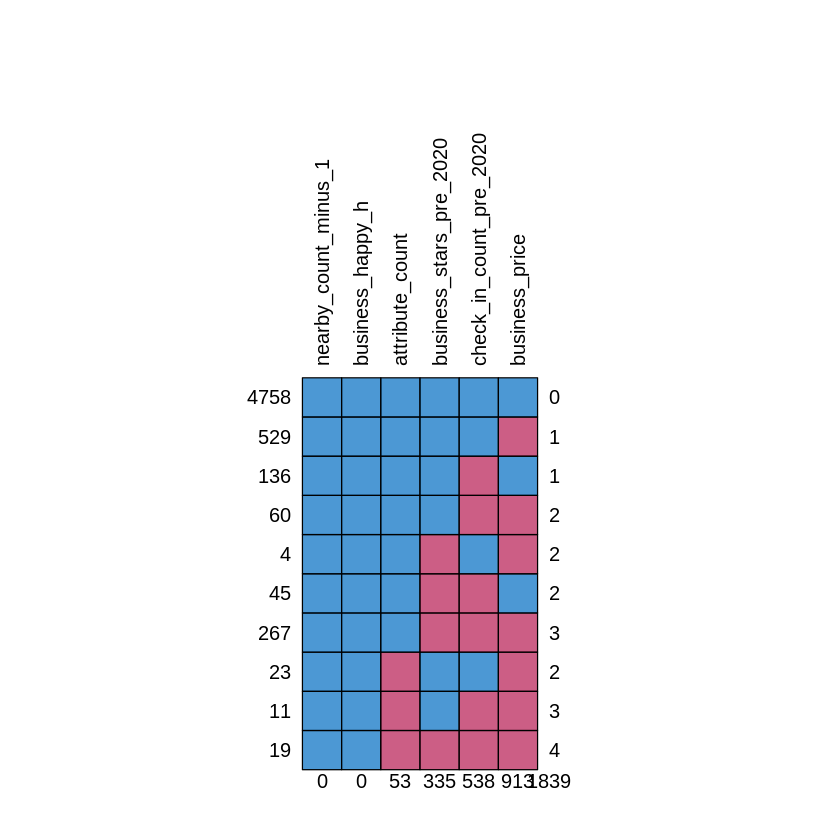

In [238]:
#inspect pattern of missings
md.pattern(data_to_analysis, plot = TRUE, rotate.names = TRUE)

## Impute Data via Mice

In [239]:
args(mice)

function (data, m = 5, method = NULL, predictorMatrix, ignore = NULL, 
    where = NULL, blocks, visitSequence = NULL, formulas, blots = NULL, 
    post = NULL, defaultMethod = c("pmm", "logreg", "polyreg", 
        "polr"), maxit = 5, printFlag = TRUE, seed = NA, data.init = NULL, 
    ...) 
NULL

In [ ]:
 ## m = num. of imputations
      # Rule of thum = at least as many imputations as percentage of missing vallues
 ## maxit = max num. of iterations

In [240]:
### Impute Data via mice
MiceImputedData <- mice(data_to_analysis, m=20, maxit = 50, seed = 543, print=FALSE)

In [241]:
summary(MiceImputedData)

Class: mids
Number of multiple imputations:  20 
Imputation methods:
check_in_count_pre_2020 business_stars_pre_2020    nearby_count_minus_1 
                  "pmm"                   "pmm"                      "" 
        attribute_count          business_price        business_happy_h 
                  "pmm"                   "pmm"                      "" 
PredictorMatrix:
                        check_in_count_pre_2020 business_stars_pre_2020
check_in_count_pre_2020                       0                       1
business_stars_pre_2020                       1                       0
nearby_count_minus_1                          1                       1
attribute_count                               1                       1
business_price                                1                       1
business_happy_h                              1                       1
                        nearby_count_minus_1 attribute_count business_price
check_in_count_pre_2020                   

## *Running the Model with Mice

### *Run with (2nd out of 20)

In [ ]:
#get complete data set (2nd out of 20)
MiceCompleteData <- complete(MiceImputedData, 2)

MiceCompleteData

In [243]:
model_after_mice <- lm(check_in_count_pre_2020 ~
              business_stars_pre_2020
              + nearby_count_minus_1
              + attribute_count
              + business_price * business_happy_h,
                                                   MiceCompleteData)

In [244]:
summary(model_after_mice) #summary(MiceAllModels$analyses[[2]])


Call:
lm(formula = check_in_count_pre_2020 ~ business_stars_pre_2020 + 
    nearby_count_minus_1 + attribute_count + business_price * 
    business_happy_h, data = MiceCompleteData)

Residuals:
    Min      1Q  Median      3Q     Max 
 -914.9  -186.5   -57.1    60.2 16987.1 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -366.02761   32.36065 -11.311  < 2e-16 ***
business_stars_pre_2020            32.21230    7.96664   4.043 5.34e-05 ***
nearby_count_minus_1                0.20003    0.01576  12.692  < 2e-16 ***
attribute_count                    37.67451    1.57954  23.852  < 2e-16 ***
business_price                     39.06473   11.46949   3.406 0.000664 ***
business_happy_h1                  19.90803   65.96453   0.302 0.762816    
business_price:business_happy_h1  -10.20475   31.72690  -0.322 0.747734    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 470.9 o

### *Run with pooled_mice

In [245]:
#build predictive model for all generated imputed data sets
MiceAllModels <- with(MiceImputedData, lm(check_in_count_pre_2020 ~
              business_stars_pre_2020
              + nearby_count_minus_1
              + attribute_count
              + business_price * business_happy_h))

In [246]:
#combine results of all 20 models
pooled_Mice <- pool(MiceAllModels)

**Results**

In [247]:
pooled_Mice_results <- as.data.frame(summary(pooled_Mice))
pooled_Mice_results

term,estimate,std.error,statistic,df,p.value
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-359.5097538,33.06354836,-10.8732962,3084.736,4.751935e-27
business_stars_pre_2020,28.9839587,8.02467959,3.6118525,4503.185,3.073318e-04
nearby_count_minus_1,0.2000211,0.01587127,12.6027187,4853.287,7.394477e-36
attribute_count,38.0149179,1.60068127,23.7492114,4073.513,7.028045e-117
business_price,39.8226480,11.72252402,3.3971053,3781.441,6.880595e-04
business_happy_h1,35.5227463,66.34805972,0.5353999,4677.295,5.923988e-01
business_price:business_happy_h1,-20.3142282,32.08504239,-0.6331370,3426.429,5.266864e-01


In [248]:
# Adding significance level visualization to the above df:

pooled_Mice_results %>%
    mutate(sign = case_when(p.value >=0 & p.value < 0.001 ~ '***',
                              p.value >=0.001 & p.value < 0.01 ~ '**',
                                p.value >=0.01 & p.value < 0.05 ~ '*',
                                 p.value >=0.05 & p.value < 0.1 ~ '.',
                                  p.value >= 0.1 ~ ' ')
)

term,estimate,std.error,statistic,df,p.value,sign
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),-359.5097538,33.06354836,-10.8732962,3084.736,4.751935e-27,***
business_stars_pre_2020,28.9839587,8.02467959,3.6118525,4503.185,3.073318e-04,***
nearby_count_minus_1,0.2000211,0.01587127,12.6027187,4853.287,7.394477e-36,***
attribute_count,38.0149179,1.60068127,23.7492114,4073.513,7.028045e-117,***
business_price,39.8226480,11.72252402,3.3971053,3781.441,6.880595e-04,***
business_happy_h1,35.5227463,66.34805972,0.5353999,4677.295,5.923988e-01,
business_price:business_happy_h1,-20.3142282,32.08504239,-0.6331370,3426.429,5.266864e-01,


In [ ]:
#   0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [249]:
# R-square for Pooled Model.

pooled_R_2 <- pool.r.squared(MiceAllModels)
pooled_R_2

,est,lo 95,hi 95,fmi
R^2,0.1725435,0.1550112,0.1906119,0.02180884


# Base Model with External Population Data

## Creating a Subset

In [ ]:
#install.packages("mice")

In [ ]:
library(mice)

In [288]:
# Selecting the variables for analysis:
data_to_analysis_2 <- data %>%
    select(check_in_count_pre_2020, business_stars_pre_2020, nearby_count_minus_1, attribute_count, business_price, business_happy_h,
                        total_population, total_population_children, total_population_youth, total_population_adults) # Adding external population data variables

## *Running the Model with NA's (Pre-Mice)

In [ ]:
# Check_in_frequency = β0 + β1 * avg_number_of_stars + β2 * business_proximity + β3 * number of characteristics + β4 * (price_level x happy hour) + ε

In [ ]:
#install.packages("car") #test
library(car)

In [290]:
model_pre_mice_2 <- lm(check_in_count_pre_2020 ~
              business_stars_pre_2020
              + nearby_count_minus_1
              + attribute_count
              + business_price * business_happy_h
              + total_population
              + total_population_children
              + total_population_youth
              + total_population_adults,
                                                   data_to_analysis_2)

In [291]:
#car::vif(m1) #test
summary(model_pre_mice_2)


Call:
lm(formula = check_in_count_pre_2020 ~ business_stars_pre_2020 + 
    nearby_count_minus_1 + attribute_count + business_price * 
    business_happy_h + total_population + total_population_children + 
    total_population_youth + total_population_adults, data = data_to_analysis_2)

Residuals:
    Min      1Q  Median      3Q     Max 
 -827.8  -205.9   -63.4    70.0 16928.5 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -3.890e+02  4.602e+01  -8.452  < 2e-16 ***
business_stars_pre_2020           3.864e+01  1.017e+01   3.798 0.000148 ***
nearby_count_minus_1              1.831e-01  2.450e-02   7.472 9.33e-14 ***
attribute_count                   4.048e+01  2.074e+00  19.518  < 2e-16 ***
business_price                    4.792e+01  1.420e+01   3.375 0.000743 ***
business_happy_h1                 5.088e+01  7.709e+01   0.660 0.509272    
total_population                 -1.728e-02  6.771e-03  -2.552 0.010743

In [ ]:
# (1128 observations deleted due to missingness)

## Pattern of Missings

In [255]:
args(md.pattern)

function (x, plot = TRUE, rotate.names = FALSE) 
NULL

,nearby_count_minus_1,business_happy_h,total_population,total_population_children,total_population_youth,total_population_adults,attribute_count,business_stars_pre_2020,check_in_count_pre_2020,business_price,
4724,1,1,1,1,1,1,1,1,1,1,0
527,1,1,1,1,1,1,1,1,1,0,1
125,1,1,1,1,1,1,1,1,0,1,1
60,1,1,1,1,1,1,1,1,0,0,2
4,1,1,1,1,1,1,1,0,1,0,2
45,1,1,1,1,1,1,1,0,0,1,2
267,1,1,1,1,1,1,1,0,0,0,3
23,1,1,1,1,1,1,0,1,1,0,2
11,1,1,1,1,1,1,0,1,0,0,3
19,1,1,1,1,1,1,0,0,0,0,4


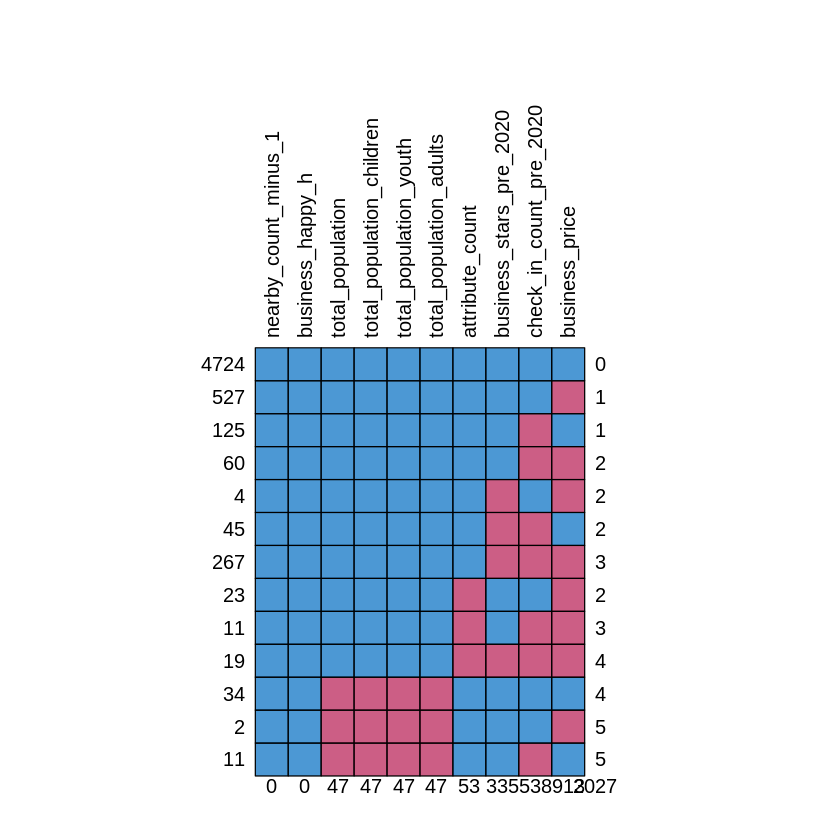

In [292]:
#inspect pattern of missings
md.pattern(data_to_analysis_2, plot = TRUE, rotate.names = TRUE)

## Impute Data via Mice

In [158]:
args(mice)

function (data, m = 5, method = NULL, predictorMatrix, ignore = NULL, 
    where = NULL, blocks, visitSequence = NULL, formulas, blots = NULL, 
    post = NULL, defaultMethod = c("pmm", "logreg", "polyreg", 
        "polr"), maxit = 5, printFlag = TRUE, seed = NA, data.init = NULL, 
    ...) 
NULL

In [ ]:
 ## m = num. of imputations
      # Rule of thum = at least as many imputations as percentage of missing vallues
 ## maxit = max num. of iterations

In [ ]:
model_pre_mice_2 <- lm(check_in_count_pre_2020 ~
              business_stars_pre_2020
              + nearby_count_minus_1
              + attribute_count
              + business_price * business_happy_h
              + total_population
              + total_population_children
              + total_population_youth
              + total_population_adults,
                                                   data_to_analysis_2)

In [293]:
### Impute Data via mice
MiceImputedData_2 <- mice(data_to_analysis_2, m=20, maxit = 50, seed = 5454, print=FALSE)

In [294]:
summary(MiceImputedData_2)

Class: mids
Number of multiple imputations:  20 
Imputation methods:
  check_in_count_pre_2020   business_stars_pre_2020      nearby_count_minus_1 
                    "pmm"                     "pmm"                        "" 
          attribute_count            business_price          business_happy_h 
                    "pmm"                     "pmm"                        "" 
         total_population total_population_children    total_population_youth 
                    "pmm"                     "pmm"                     "pmm" 
  total_population_adults 
                    "pmm" 
PredictorMatrix:
                        check_in_count_pre_2020 business_stars_pre_2020
check_in_count_pre_2020                       0                       1
business_stars_pre_2020                       1                       0
nearby_count_minus_1                          1                       1
attribute_count                               1                       1
business_price            

## *Running the Model with Mice

### *Run with (x.th out of 20)

In [264]:
set.seed(123)
sample(1:20, 1)

[1] 15

In [ ]:
#get complete data set (2nd out of 20)
MiceCompleteData_2 <- complete(MiceImputedData_2, 15)

MiceCompleteData_2

In [296]:
model_after_mice_2 <- lm(check_in_count_pre_2020 ~
               business_stars_pre_2020
              + nearby_count_minus_1
              + attribute_count
              + business_price * business_happy_h
              + total_population
              + total_population_children
              + total_population_youth
              + total_population_adults,
                                          MiceCompleteData_2)

In [297]:
summary(model_after_mice_2) #summary(MiceAllModels$analyses[[2]])


Call:
lm(formula = check_in_count_pre_2020 ~ business_stars_pre_2020 + 
    nearby_count_minus_1 + attribute_count + business_price * 
    business_happy_h + total_population + total_population_children + 
    total_population_youth + total_population_adults, data = MiceCompleteData_2)

Residuals:
    Min      1Q  Median      3Q     Max 
 -911.7  -183.3   -55.2    64.5 16984.7 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -3.168e+02  3.685e+01  -8.596  < 2e-16 ***
business_stars_pre_2020           2.859e+01  7.945e+00   3.599 0.000322 ***
nearby_count_minus_1              1.685e-01  2.025e-02   8.319  < 2e-16 ***
attribute_count                   3.772e+01  1.573e+00  23.976  < 2e-16 ***
business_price                    3.914e+01  1.153e+01   3.394 0.000692 ***
business_happy_h1                 1.772e+01  6.595e+01   0.269 0.788123    
total_population                 -1.377e-02  5.568e-03  -2.473 0.013409

### *Run with pooled_mice

In [298]:
#build predictive model for all generated imputed data sets
MiceAllModels_2 <- with(MiceImputedData_2, lm(check_in_count_pre_2020 ~
              business_stars_pre_2020
              + nearby_count_minus_1
              + attribute_count
              + business_price * business_happy_h
              + total_population
              + total_population_children
              + total_population_youth
              + total_population_adults))

In [301]:
#combine results of all 20 models
pooled_Mice_2 <- pool(MiceAllModels_2)

**Results**

In [302]:
pooled_Mice_results_2 <- as.data.frame(summary(pooled_Mice_2))
pooled_Mice_results_2

term,estimate,std.error,statistic,df,p.value
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-312.45069192,37.709625153,-8.2857013,4553.415,1.528337e-16
business_stars_pre_2020,27.36391588,8.228793258,3.3253862,3268.910,8.927063e-04
nearby_count_minus_1,0.16707369,0.021245662,7.8638968,2010.654,6.023766e-15
attribute_count,37.82914845,1.609868982,23.4982777,4557.096,2.392606e-115
business_price,39.25635005,11.893930750,3.3005363,3612.262,9.743726e-04
business_happy_h1,31.43392077,67.404877321,0.4663449,3210.078,6.410003e-01
total_population,-0.01447550,0.005636226,-2.5682964,5598.844,1.024567e-02
total_population_children,0.01018738,0.005774375,1.7642399,5567.020,7.774643e-02
total_population_youth,0.01397830,0.005613700,2.4900341,5554.323,1.280210e-02


In [303]:
# Adding significance level visualization to the above df:

pooled_Mice_results_2 %>%
    mutate(sign = case_when(p.value >=0 & p.value < 0.001 ~ '***',
                              p.value >=0.001 & p.value < 0.01 ~ '**',
                                p.value >=0.01 & p.value < 0.05 ~ '*',
                                 p.value >=0.05 & p.value < 0.1 ~ '.',
                                  p.value >= 0.1 ~ ' ')
)

term,estimate,std.error,statistic,df,p.value,sign
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),-312.45069192,37.709625153,-8.2857013,4553.415,1.528337e-16,***
business_stars_pre_2020,27.36391588,8.228793258,3.3253862,3268.910,8.927063e-04,***
nearby_count_minus_1,0.16707369,0.021245662,7.8638968,2010.654,6.023766e-15,***
attribute_count,37.82914845,1.609868982,23.4982777,4557.096,2.392606e-115,***
business_price,39.25635005,11.893930750,3.3005363,3612.262,9.743726e-04,***
business_happy_h1,31.43392077,67.404877321,0.4663449,3210.078,6.410003e-01,
total_population,-0.01447550,0.005636226,-2.5682964,5598.844,1.024567e-02,*
total_population_children,0.01018738,0.005774375,1.7642399,5567.020,7.774643e-02,.
total_population_youth,0.01397830,0.005613700,2.4900341,5554.323,1.280210e-02,*


In [ ]:
#   0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [304]:
# R-square for Pooled Model.

pooled_R_2_2 <- pool.r.squared(MiceAllModels_2)
pooled_R_2_2

,est,lo 95,hi 95,fmi
R^2,0.172985,0.1535576,0.1930697,0.2083983
